# 02_Classification

> Last Update: 06/13/2020 <br>
Author: [Gunsu Altindag](https://www.linkedin.com/in/gunsualtindag) | [Yalim Demirkesen](https://www.linkedin.com/in/yalimdemirkesen/)

**Description**

After the preprocessing is completed, we have the dataset that we will train/test our classification model. After the testing is completed, I have an additional dataset for all the combinations of location, industry, part of the day, day of the week and amount spent. The model will be used to predict how many conversions we will have as a result of the campaigns.

In [ ]:
# necessary libraries:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")
import pandas as pd
import numpy as np
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# display settings
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = 500

# modelling libraries:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn import metrics

In [ ]:
# # import pickle
# # from datetime import datetime, date, time, timedelta
# # from dateutil import relativedelta

# from scipy.stats import gaussian_kde
# # from hashlib import md5

# # import os 
# # import sys
# # import re
# # import io
# # import requests
# # import zipfile

# #import pystan 
# #import matplotlib as plt



# from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, StratifiedShuffleSplit, KFold, cross_val_score
# from sklearn.base import clone, BaseEstimator, TransformerMixin
# from sklearn.metrics import f1_score, accuracy_score, precision_score, confusion_matrix, roc_curve, precision_recall_curve, auc, make_scorer, recall_score
# from sklearn.utils.class_weight import compute_class_weight
# from sklearn.compose import ColumnTransformer, make_column_transformer
# from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, LabelEncoder, MultiLabelBinarizer
# from sklearn_features.transformers import DataFrameSelector
# from itertools import product


# # from __future__ import print_function





# # from sklearn.preprocessing import Imputer
# # from sklearn.preprocessing import CategoricalEncoder

# # from sklearn.compose import TransformedTargetRegressor
# from sklearn.ensemble import RandomForestClassifier
# # from sklearn.preprocessing import QuantileTransformer
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import BaggingClassifier 
# from sklearn.metrics import balanced_accuracy_score
# # from imblearn.datasets import fetch_datasets
# from sklearn.svm import SVC
# from sklearn.ensemble import VotingClassifier 

# # from sklearn.datasets.samples_generator import make_blobs
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import SGDClassifier
# # from sklearn.metrics import hamming_loss
# # from sklearn import metrics


# #Import scikit-learn metrics module for accuracy calculation
# # from sklearn import metrics
# # from imblearn.ensemble import BalancedBaggingClassifier
# # from imblearn.ensemble import BalancedRandomForestClassifier
# # from imblearn.ensemble import EasyEnsembleClassifier
# # from imblearn.ensemble import RUSBoostClassifier
# # from imblearn.metrics import geometric_mean_score
# from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
# import nltk
# # from nltk.classify.scikitlearn import SklearnClassifier
# from sklearn.svm import LinearSVC
# from sklearn.feature_selection import SelectFromModel

# from imblearn import under_sampling, over_sampling

# # from imblearn.datasets import make_imbalance
# # from imblearn.under_sampling import NearMiss
# # from imblearn.pipeline import make_pipeline
# # from imblearn.metrics import classification_report_imbalanced
# # from collections import Counter
# # from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
# # from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours, TomekLinks
# from imblearn.over_sampling import RandomOverSampler, SMOTE
# from imblearn.combine import SMOTEENN, SMOTETomek
# # from imblearn.ensemble import BalanceCascade, EasyEnsemble

# # import sagemaker
# # from sagemaker.tensorflow import TensorFlow

# import tensorflow # Imports tensorflow
# import keras # Imports keras

# from keras.models import Sequential #Sequential Models
# from keras.layers import Dense, Dropout #Dense Fully Connected Layer Type
# from keras.optimizers import SGD #Stochastic Gradient Descent Optimizer
# from keras.callbacks import EarlyStopping
# from keras.wrappers.scikit_learn import KerasClassifier
# from keras.utils import to_categorical

# from sklearn import tree
# import graphviz
# from IPython.display import Image
# # import io
# # from sklearn.externals.six import StringIO  
# import pydot
# import pydotplus
# from graphviz import Digraph

# # from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz

In [ ]:
# class DataFrameSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, attribute_names):
#         self.attribute_names=attribute_names
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         return X[self.attribute_names].values

In [ ]:
# !pip install pymc3

In [ ]:
# import pymc3 as pm

In [ ]:
# !conda config --add channels conda-forge

## Uploading and Preparing the Data

In [ ]:
fb = pd.read_csv("./data/fb.csv")

In [ ]:
df_sept = pd.read_csv("./data/testdata_sep.csv")

In [ ]:
fb.shape

In [ ]:
fb.drop(columns=['Unnamed: 0'], inplace=True)
df_sept.drop(columns=['Unnamed: 0'], inplace=True)

I will exclude the month of September from the training and testing data. After I test the data, I will go on and make the predictions and optimization and compare it with the actual results in September. 

In [ ]:
fb[(fb['2019']==1) & (fb['month']==9)].to_csv('./data/actual_sep.csv')

In [ ]:
fb = fb[~((fb['2019']==1) & (fb['month']==9))].reset_index(drop=True)

In [ ]:
fb.head()

In [ ]:
df_sept.head()

In [ ]:
# creating the predictor and target datasets:
X = fb[['month','week_num','DE','ES','FR','IT','MX','UK','US','ZA','OR','SSF','night','morning','afternoon','evening',
        'Mon','Tues','Weds','Thurs','Fri','Sat','Sun','2018','2019','amount_spent_usd']]
y = fb['labels']

In [ ]:
X_sep = df_sept[['month','week_num','DE','ES','FR','IT','MX','UK','US','ZA','OR','SSF','night','morning','afternoon','evening',
        'Mon','Tues','Weds','Thurs','Fri','Sat','Sun','2018','2019','amount_spent_usd']]

In [ ]:
# splitting the data into training and testing:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25,random_state=44)

Checking the shape of each new dataset. I expect training and testing datasets to have same length. All datasets need to have same number of predictors.

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
X_test.shape

In [ ]:
X_sep.shape

In [ ]:
y_train.value_counts()

Scaling for the amount spent column throughout all the datasets:

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train['amount_spent_usd'] = scaler.fit_transform(X_train.amount_spent_usd.values.reshape(-1, 1))

In [ ]:
X_train.amount_spent_usd.describe()

In [ ]:
X_test['amount_spent_usd'] = scaler.fit_transform(X_test.amount_spent_usd.values.reshape(-1, 1))

In [ ]:
X_test.amount_spent_usd.describe()

In [ ]:
X_sep['amount_spent_usd'] = scaler.fit_transform(X_sep.amount_spent_usd.values.reshape(-1, 1))

In [ ]:
X_sep.amount_spent_usd.describe()

## Modelling

In the modelling phase, the road map is to create an ensemble model including different classification models. At the end the models will have a weight as much as their accuracy. The weights will be summed and the class with the most votes will be accepted as the final prediction.

Let's say, each algorithm's predictions for the level of conversion if we spend $50 for 09/03/2019 evening (in the time zone of the host account) for users in Germany who are in OR industry:
- Algorithm 1 predicts for each class: 0.23 | 0.07 | 0.63 | 0.07
- Algorithm 2 predicts for each class: 0.21 | 0.02 | 0.57 | 0.20
- Algorithm 3 predicts for each class: 0.27 | 0.05 | 0.66 | 0.02
- Algorithm 4 predicts for each class: 0.15 | 0.04 | 0.59 | 0.22
- Algorithm 5 predicts for each class: 0.19 | 0.06 | 0.33 | 0.42

Then the conversions between 3 and 5 wins since its average probability is higher than any other class.

### Logistic Regression

In logistic regression, we will use softmax instead of sigmoid function which is the default case. The reason is we are working with multiclass problem. While initiating the model, there will be different hyperparameters that we need to work with which are listed below:
- `multiclass`: this will be `multinomial` since we are dealing with a multiclass problem.
- `solver`: there are plenty solvers that we can use for this use case which are `newton-cg`, `sag`, `saga` and `lbfgs`.
    - Newton's Method uses a quadratic approximation. In each step we are getting closer to the global optima. It is expensive to deploy and also has problems with minimax (saddle) points. 
    <img src="https://i.stack.imgur.com/VqQnf.png" >
    - Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm is very similar to Newton's but it stores that represent the approximation. lbfgs is very memory efficient but have some drawbacks like converging to any value. No global optima is guarenteed.
    - Stochastic Average Gradient holds a memory of previous gradient values and using this technique it converges faster. Storing older iterations makes it more precise but slower.
    - SAGA is a version of Stochastic Average Gradient that supports L1 regularization which eliminates the non-contributing predictors. That's why its best use is with large datasets.
- `penalty`: most of the solvers need `l2` but with saga we can also use `l1` but we don't need to utilize that since out dataset is not huge in terms of predictors.
- `tol`: stands for tolerance. This is the level for scikit-learn to understand when to stop for optimizing the objective function of the model.
- `C`: smaller C gets, stronger regularization becomes. 
- `max_iter`: just like tol, max_iter provides a limit for the model to stop looking for additional improvement.

**[Source: scikit-learn logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)**

In [32]:
softmax_params = {
    'C':[12,13,14,15],
    'max_iter':[10000,100000]
    
}

softmax_grid = GridSearchCV(
                    LogisticRegression(multi_class='multinomial', 
                                       solver='lbfgs',
                                       penalty='l2',
                                       tol=1e-16, 
                                      ),
                    softmax_params,
                    cv = 5,
                    verbose = 1,
                    return_train_score = True
)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.5min finished


GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='multinomial', tol=1e-16),
             param_grid={'C': [12, 13, 14, 15], 'max_iter': [10000, 100000]},
             return_train_score=True, verbose=1)

In [33]:
softmax_grid.best_score_

0.5474937171701919

In [34]:
softmax_grid.best_params_

{'C': 15, 'max_iter': 10000}

In [35]:
# fit the data:
softmax_reg=softmax_grid.fit(X_train,y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.5min finished


In [36]:
# generate the predictions:
y_pred_softmax = softmax_grid.predict(X_test)  

In [40]:
y_pred_sep_softmax = softmax_grid.predict(X_sep)

In [46]:
label=np.unique(y_train)

In [70]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.tight_layout()

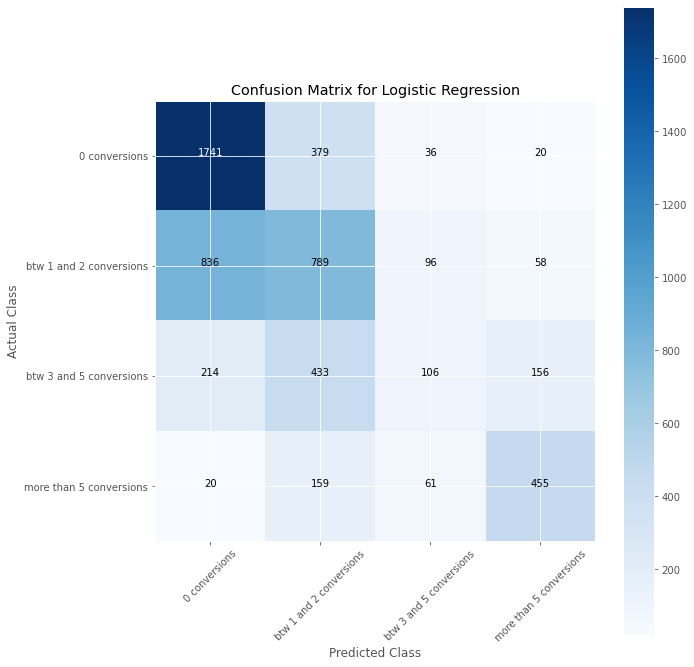

In [71]:
cnf_matrix = confusion_matrix(y_test, y_pred_softmax,labels=label)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=label,
                      title='Confusion Matrix for Logistic Regression')

In [72]:
print("Accuracy of the training set: {}".format(round(accuracy_score(y_train,softmax_grid.predict(X_train)),4)))
print("Accuracy of the training set: {}".format(round(accuracy_score(y_test,softmax_grid.predict(X_test)),4)))

Accuracy of the training set: 0.5504
Accuracy of the training set: 0.556


As expected the accuracy of the Logistic Regression model is not that high. After all it is a better model to use when we have a binary classification problem. Next model I will use it Random Forest. Now I am expecting a higher performance since we will be using an ensemble model that takes into account the "forest" instead of the single "trees".

### Random Forest

In logistic regression, we will use softmax instead of sigmoid function which is the default case. The reason is we are working with multiclass problem. While initiating the model, there will be different hyperparameters that we need to work with which are listed below:
- `multiclass`: this will be `multinomial` since we are dealing with a multiclass problem.
- `solver`: there are plenty solvers that we can use for this use case which are `newton-cg`, `sag`, `saga` and `lbfgs`.
    - Newton's Method uses a quadratic approximation. In each step we are getting closer to the global optima. It is expensive to deploy and also has problems with minimax (saddle) points. 
    <img src="https://i.stack.imgur.com/VqQnf.png" >
    - Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm is very similar to Newton's but it stores that represent the approximation. lbfgs is very memory efficient but have some drawbacks like converging to any value. No global optima is guarenteed.
    - Stochastic Average Gradient holds a memory of previous gradient values and using this technique it converges faster. Storing older iterations makes it more precise but slower.
    - SAGA is a version of Stochastic Average Gradient that supports L1 regularization which eliminates the non-contributing predictors. That's why its best use is with large datasets.
- `penalty`: most of the solvers need `l2` but with saga we can also use `l1` but we don't need to utilize that since out dataset is not huge in terms of predictors.
- `tol`: stands for tolerance. This is the level for scikit-learn to understand when to stop for optimizing the objective function of the model.
- `C`: smaller C gets, stronger regularization becomes. 
- `max_iter`: just like tol, max_iter provides a limit for the model to stop looking for additional improvement.

**[Source: scikit-learn logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)**

In [ ]:
clf = RandomForestClassifier(n_estimators = 50, max_leaf_nodes = 16 , n_jobs =-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20,40,50]
}

scorers = {
    'precision_score': make_scorer(precision_score,average='micro'),
    'recall_score': make_scorer(recall_score,average='micro')
}

In [ ]:
refit_score='precision_score'
    #"""
    #fits a GridSearchCV classifier using refit_score for optimization
    #prints classifier performance metrics
    #"""
skf = StratifiedKFold(n_splits=10)
grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
grid_search.fit(train_X, y_train)

In [ ]:
    # make the predictions
y_pred = grid_search.predict(test_X)
y_preda = grid_search.predict(testa_X)

print('Best params for {}'.format(refit_score))
print(grid_search.best_params_)

    # confusion matrix on the test data.
print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn import linear_model


### What is the difference between the Lg_mult and softmax_reg? OR picking solver as lbfgs and newton-cg?

In sklearn explanation, it suggests that lbfgs is recommended for small data-sets and newton-cg for . Both supports L2 regularization.

>**Newton’s Method**: *Recall the motivation for gradient descent step at x: we minimize the quadratic function (i.e. Cost Function).
Newton’s method uses in a sense a better quadratic function minimisation. A better because it uses the quadratic approximation (i.e. first AND second partial derivatives).
You can imagine it as a twisted Gradient Descent with The Hessian (The Hessian is a square matrix of second-order partial derivatives of order nxn).
Moreover, the geometric interpretation of Newton's method is that at each iteration one approximates  f(x) by a quadratic function around xn, and then takes a step towards the maximum/minimum of that quadratic function (in higher dimensions, this may also be a saddle point). Note that if f(x) happens to be a quadratic function, then the exact extremum is found in one step.*

> Drawbacks:
It’s computationally expensive because of The Hessian Matrix (i.e. second partial derivatives calculations).
It attracts to Saddle Points which are common in multivariable optimization (i.e. a point its partial derivatives disagree over whether this input should be a maximum or a minimum point!).

>**Limited-memory Broyden-Fletcher-Goldfarb-Shanno Algorithm:** *In a nutshell, it is analogue of the Newton’s Method but here the Hessian matrix is approximated using updates specified by gradient evaluations (or approximate gradient evaluations). In other words, using an estimation to the inverse Hessian matrix. 
The term Limited-memory simply means it stores only a few vectors that represent the approximation implicitly. 
If I dare say that when dataset is small, L-BFGS relatively performs the best compared to other methods especially it saves a lot of memory, however there are some “serious” drawbacks such that if it is unsafeguarded, it may not converge to anything.*

- [https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
- [https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions)

### There are other solvers that are compatible with multinomial and L2 regularization: sag and saga. Why did we just used two of the solver? These two are faster on large datasets. (We don't need to  run the model fast but it will be bigger at some point.)

In [ ]:
clf_lg_mult = LogisticRegression(multi_class = 'multinomial',class_weight='balanced',
                              C=10, solver = 'newton-cg').fit(train_X, y_train)
clf_rf_enpy = RandomForestClassifier(criterion='entropy',max_depth=15, 
                                 max_features=40,min_samples_split=10, 
                                 n_estimators=100).fit(train_X, y_train)
clf_rf_gini = RandomForestClassifier(criterion='gini',max_depth=15, 
                                 max_features=40,min_samples_split=10, 
                                 n_estimators=100).fit(train_X, y_train)


In [ ]:
# Copy pasted here for comparison purposes. Do not uncomment since it has already run before!

# softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs" ,penalty='l2',tol=1e-16,
#                                 class_weight='balanced', C = 10,max_iter=10000 ) 

# clf_lg_mult = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',class_weight='balanced',
#                               C=10)

In [ ]:
y_pred_rf_enpy= clf_rf_enpy.predict(test_X)
probs_rf_enpy=clf_rf_enpy.predict_proba(test_X)
y_pred_clf_gini= clf_rf_gini.predict(test_X) 
probs_rf_gini=clf_rf_gini.predict_proba(test_X)
y_pred_lg_mult= clf_lg_mult.predict(test_X)
probs_lg_mult=clf_lg_mult.predict_proba(test_X)

In [ ]:
y_preda_rf_enpy= clf_rf_enpy.predict(testa_X)
probsa_rf_enpy=clf_rf_enpy.predict_proba(testa_X)
y_preda_clf_gini= clf_rf_gini.predict(testa_X)
probsa_rf_gini=clf_rf_gini.predict_proba(testa_X)
y_preda_lg_mult= clf_lg_mult.predict(testa_X)
probsa_lg_mult=clf_lg_mult.predict_proba(testa_X)

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_clf_gini,labels=label)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=label,
                      title='Confusion matrix, without normalization')

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_rf_enpy,labels=label)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=label,
                      title='Confusion matrix, without normalization')

In [ ]:
y_test_df=pd.DataFrame(y_test)


In [ ]:
y_test.head()

In [ ]:
my_list_mult=np.round(np.array(probs_lg_mult),2).tolist()

In [ ]:
my_lista_mult=np.round(np.array(probsa_lg_mult),2).tolist()

In [ ]:
my_list_gini=np.round(np.array(probs_rf_gini),2).tolist()
y_test_df['pred_rf_gini']=y_pred_clf_gini
y_test_df['probs_rf_gini']=my_list_gini

In [ ]:
my_lista_gini=np.round(np.array(probsa_rf_gini),2).tolist()
y_testa_df = pd.DataFrame(y_preda_clf_gini, columns = ['pred_rf_gini'])
y_testa_df['probs_rf_gini']=my_lista_gini

In [ ]:
my_list_enpy=np.round(np.array(probs_rf_enpy),2).tolist()
y_test_df['pred_rf_enpy']=y_pred_rf_enpy
y_test_df['probs_rf_enpy']=my_list_enpy

In [ ]:
my_lista_enpy=np.round(np.array(probsa_rf_enpy),2).tolist()
y_testa_df['pred_rf_enpy']=y_preda_rf_enpy
y_testa_df['probs_rf_enpy']=my_lista_enpy

In [ ]:

y_test_df['pred_lg_mult']=y_pred_lg_mult
y_test_df['probs_lg_mult']=my_list_mult

In [ ]:

y_testa_df['pred_lg_mult']=y_preda_lg_mult
y_testa_df['probs_lg_mult']=my_lista_mult

In [ ]:
y_pred_softmax = softmax_reg.predict(test_X) 
probs_softmax = softmax_reg.predict_proba(test_X) 
my_list_softmax=np.round(np.array(probs_softmax),2).tolist()

y_test_df['pred_softmax']=y_pred_softmax
y_test_df['probs_lg_softmax']=my_list_softmax


In [ ]:
y_preda_softmax = softmax_reg.predict(testa_X) 
probsa_softmax = softmax_reg.predict_proba(testa_X) 
my_lista_softmax=np.round(np.array(probsa_softmax),2).tolist()

y_testa_df['pred_softmax']=y_preda_softmax
y_testa_df['probs_lg_softmax']=my_lista_softmax


In [ ]:
y_test_df.head(2)

In [ ]:
y_testa_df.head(2)

In [ ]:
X_testa.reset_index(drop = True, inplace = True)

In [ ]:
df_test = pd.merge(X_test,y_test_df,how = 'left',left_index = True, right_index = True)

In [ ]:
df_testa = pd.merge(X_testa.reset_index(drop = True),y_testa_df,how = 'left',left_index = True, right_index = True)

In [ ]:
X_testa.shape

In [ ]:
y_testa_df.shape

In [ ]:
df_testa.shape

In [ ]:
y_testa_df.isnull().sum()

In [ ]:
df_testa.isnull().sum()

In [ ]:
df_test.head()

In [ ]:
df_testa.head()

In [ ]:
df_testa.isnull().sum()

In [ ]:
print("actual: " + str(df_test.iloc[0:1, 7:8]))
print("probability rf_gini: " + str(sorted(zip(clf_rf_gini.classes_, probs_rf_gini[0] ), key=lambda x:x[1] )[-2:]))
print("probability rf_enpy: " + str(sorted(zip(clf_rf_enpy.classes_, probs_rf_enpy[0] ), key=lambda x:x[1] )[-2:]))
print("probability lg_mult: " + str(sorted(zip(clf_lg_mult.classes_, probs_lg_mult[0] ), key=lambda x:x[1] )[-2:]))



### Why assigning different weights to knn, dt and SVC in votingclassifier()? Because knn is lazy and has a low performance?

In [ ]:
print(__doc__)

from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=5,class_weight='balanced')
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=.01, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(train_X, y_train)
clf2.fit(train_X, y_train)
clf3.fit(train_X, y_train)
eclf.fit(train_X, y_train)


In [ ]:
cross_val_score(eclf,train_X, y_train, cv=10, scoring="accuracy")

In [ ]:
y_pred_clf1 = clf1.predict(test_X) 
y_pred_clf2 = clf2.predict(test_X)
y_pred_clf3 = clf3.predict(test_X)
y_pred_voter=eclf.predict(test_X)

In [ ]:
select_ind = np.array(list(range(0,100)))
testa_X.tocsr()[select_ind,:]

In [ ]:
y_preda_clf1 = clf1.predict(testa_X)
y_preda_clf2 = clf2.predict(testa_X)
y_preda_clf3 = clf3.predict(testa_X)
y_preda_voter=eclf.predict(testa_X)

In [ ]:
prb_voter_clf=eclf.predict_proba(test_X)
my_list_voter=np.round(np.array(prb_voter_clf),2).tolist()

In [ ]:
prba_voter_clf=eclf.predict_proba(testa_X)
my_lista_voter=np.round(np.array(prba_voter_clf),2).tolist()

In [ ]:
df_test['pred_voter']=y_pred_voter
df_test['prop_voter']=my_list_voter

In [ ]:
df_testa['pred_voter']=y_preda_voter
df_testa['prop_voter']=my_lista_voter

In [ ]:
df_test.head()

In [ ]:
df_testa.head()

In [ ]:
cross_val_score(clf_rf_gini,train_X, y_train, cv=10, scoring="accuracy")

In [ ]:
cross_val_score(clf_rf_enpy,train_X, y_train, cv=10, scoring="accuracy")

In [ ]:
cnf_matrix_gini = confusion_matrix(y_test,y_pred_voter,labels=label)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix_gini, classes=label,
                      title='Confusion matrix, without normalization')

In [ ]:
#rf_err_df=df_test[df_test['labels']!=df_test['rf_pred']].iloc[0:30,0:12].head(30)

In [ ]:
unique_val_count(df_test.target_grouped)

In [ ]:
df_test.head(15)

In [ ]:
df_test["month"] = pd.to_numeric(df_test["month"])

In [ ]:
df_testa["month"] = pd.to_numeric(df_testa["month"])

In [ ]:
df_test_entph=df_test[df_test['target_grouped']=='entphotographyentrepreneur']

In [ ]:
ax_low_ent= df_test_entph[(df_test_entph['pred_rf_gini']=="btw 0 and 2 conversions")|
             (df_test_entph['pred_rf_gini']=="btw 3 and 6 conversions")].groupby(['pred_rf_gini',
                                                                                'month','year'])['pred_rf_gini'].count().unstack(0).sort_values(by=['year',
             'month'],ascending=[True,True]).plot.bar(title="Number monthly frequencies",
                                                                           figsize=(18,5),
                                                                           color=['salmon','navy','cyan','yellow']
                                                                           ,width = 0.90)

In [ ]:
np.unique(df_test.labels)

In [ ]:
df_test.head(2)

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

#df_test['new'] = np.where(df_test.labels=='btw 0 and 2 conversions', 'low',
                          # np.where(df_test.labels=='more 3 than 6 conversions', 'low','high'))

In [ ]:
#df_test=df_test.drop('new',axis=1)

Below code generated an error saying that 'seaborn doesn't have a function called catplot.' That's why I picked countplot with the same purpose.

In [ ]:
# orders=label
# sns.set_style("whitegrid")
# sns.set(font_scale=1)
# p=sns.catplot(x="labels",hue="labels", kind="count",order=orders,height=8,aspect=1,col='year', data=df_test)



In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x=df_test['year'], hue = df_test['labels'], 
                    data = df_test, )

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier( splitter = "random" ,class_weight='balanced', max_leaf_nodes = 5, min_samples_split=10 ), 
                            n_estimators =100 , max_samples = 0.5 , bootstrap = True , n_jobs =-1 ) 

In [ ]:
bag_clf.fit(train_X,y_train)

In [ ]:
cross_val_score(bag_clf,train_X, y_train, cv=10, scoring="accuracy")

In [ ]:
X_train.shape[0]

In [ ]:
smote=SMOTE('minority')

In [ ]:
X_sm_logr,y_sm_logr=smote.fit_sample(train_X,y_train)

In [ ]:
logr_sm=softmax_reg.fit(X_sm_logr,y_sm_logr)

In [ ]:
softmax_pred_sm=logr_sm.predict(test_X) 


In [ ]:
softmax_preda_sm=logr_sm.predict(testa_X) 


In [ ]:
cnf_matrix = confusion_matrix(y_test,softmax_pred_sm,labels=np.unique(y_train))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=np.unique(y_train),
                      title='Confusion matrix, without normalization')

In [ ]:
cross_val_score(logr_sm,X_sm_logr, y_sm_logr, cv=10, scoring="accuracy",)

In [ ]:
print (metrics.classification_report(y_test,softmax_pred_sm, target_names=df_test['labels'].unique()))

In [ ]:
#lsvc

lsvc = LinearSVC(C=0.9, penalty="l1", dual=False, multi_class='ovr',class_weight='balanced').fit(train_X, y_train)
model = SelectFromModel(lsvc, prefit=True)

In [ ]:
y_pred_lsvc= lsvc.predict(test_X) 

In [ ]:
y_preda_lsvc= lsvc.predict(testa_X) 

In [ ]:
#df_test['pred_lsvc']=y_pred_lsvc

In [ ]:
#df_test=df_test.drop('pred_lsvc',axis=1)

In [ ]:
cross_val_score(lsvc,train_X, y_train, cv=10, scoring="accuracy",)

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_pred_lsvc,labels=np.unique(y_train))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=np.unique(y_train),
                      title='Confusion matrix, without normalization')

In [ ]:
print(metrics.classification_report(y_test, y_pred_lsvc, target_names=df_test['labels'].unique()))

In [ ]:
y_pred_bag= bag_clf.predict(test_X) 

In [ ]:
y_preda_bag= bag_clf.predict(testa_X) 

In [ ]:
prb_bag_clf=bag_clf.predict_proba(test_X)
my_list_bag=np.round(np.array(prb_bag_clf),2).tolist()

In [ ]:
prba_bag_clf=bag_clf.predict_proba(testa_X)
my_lista_bag=np.round(np.array(prba_bag_clf),2).tolist()

In [ ]:
df_test['pred_bag']=y_pred_bag

In [ ]:
df_testa['pred_bag']=y_preda_bag

In [ ]:
df_test['prb_bag_clf']=my_list_bag

In [ ]:
df_testa['prb_bag_clf']=my_lista_bag

In [ ]:
df_test.isnull().sum()

In [ ]:
df_testa.isnull().sum()

In [ ]:
df_test.columns

In [ ]:
df_test.head(10)

In [ ]:
#print(metrics.classification_report(y_test, y_pred_bag, target_names=df['labels'].unique()))

In [ ]:
#print(metrics.classification_report(y_test, y_pred_clf1, target_names=df['labels'].unique()))

In [ ]:
#print(metrics.classification_report(y_test, y_pred_clf2, target_names=df['labels'].unique()))

In [ ]:
#print(metrics.classification_report(y_test, y_pred_clf3, target_names=df['labels'].unique()))

In [ ]:
#print(metrics.classification_report(y_test, y_pred_voter, target_names=df['labels'].unique()))

In [ ]:
tree_reg=DecisionTreeClassifier(class_weight='balanced',max_depth=3,criterion='gini',min_samples_leaf=10)
tree_reg.fit(train_X,y_train)

In [ ]:
y_pred_tree=tree_reg.predict(test_X)
prb_tree_reg=tree_reg.predict_proba(test_X)
my_list_tree=np.round(np.array(prb_tree_reg),2).tolist()


In [ ]:
y_preda_tree=tree_reg.predict(testa_X)
prba_tree_reg=tree_reg.predict_proba(testa_X)
my_lista_tree=np.round(np.array(prba_tree_reg),2).tolist()


In [ ]:
df_test['pred_reg_tree']=y_pred_tree
df_test['probs_reg_tree']=my_list_tree

In [ ]:
df_testa['pred_reg_tree']=y_preda_tree
df_testa['probs_reg_tree']=my_lista_tree

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_tree,labels=np.unique(y_train))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=np.unique(y_train),
                      title='Confusion matrix, without normalization')

In [ ]:
!pip install xgboost

In [ ]:
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot

In [ ]:
# grid search
model_xgb = XGBClassifier()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model_xgb, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(train_X,y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators.png')

In [ ]:
# XGBoost, Tune n_estimators and max_depth
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot

In [ ]:
model_xgb = XGBClassifier()
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model_xgb, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(train_X, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_max_depth.png')

In [ ]:
model_xgb_tn = XGBClassifier(n_estimators=150,max_depth=4,objective='multi:softprob')
model_xgb_tn.fit(train_X,y_train)

In [ ]:
y_pred_xgb=model_xgb_tn.predict(test_X)

In [ ]:
y_preda_xgb=model_xgb_tn.predict(testa_X)

In [ ]:
np.set_printoptions(precision=3,suppress=True)
prb_xgb_clf=model_xgb_tn.predict_proba(test_X)
my_list_xgb=np.round(np.array(prb_xgb_clf),2).tolist()

In [ ]:
np.set_printoptions(precision=3,suppress=True)
prba_xgb_clf=model_xgb_tn.predict_proba(testa_X)
my_lista_xgb=np.round(np.array(prba_xgb_clf),2).tolist()

In [ ]:
df_test['pred_xgb']=y_pred_xgb
df_test['xgb_prob']=my_list_xgb


In [ ]:
df_testa['pred_xgb']=y_preda_xgb
df_testa['xgb_prob']=my_lista_xgb


In [ ]:
print(metrics.classification_report(y_test, y_pred_xgb, target_names=df_test['labels'].unique()))

In [ ]:
df_test.head(20)

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_xgb,labels=np.unique(y_train))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=np.unique(y_train),
                      title='Confusion matrix, without normalization')

In [ ]:
fb.columns

In [ ]:
# Create adaboost classifer object
abc_discrete =AdaBoostClassifier(n_estimators=100, base_estimator=clf_rf_gini,learning_rate=0.001,
    algorithm="SAMME")

abc_real =AdaBoostClassifier(n_estimators=100, base_estimator=clf_rf_gini,learning_rate=0.001)

In [ ]:
# Train Adaboost Classifer
abc_discrete.fit(train_X, y_train)
abc_real.fit(train_X, y_train)

In [ ]:
#Predict the response for test dataset
y_pred_abc_disc = abc_discrete.predict(test_X)
y_pred_abc_real = abc_real.predict(test_X)




# Model Accuracy, how often is the classifier correct?
print("Accuracy abc SAMME:",metrics.accuracy_score(y_test, y_pred_abc_disc))
print("Accuracy abc:",metrics.accuracy_score(y_test, y_pred_abc_real))

In [ ]:
#Predict the response for test dataset
y_preda_abc_disc = abc_discrete.predict(testa_X)
y_preda_abc_real = abc_real.predict(testa_X)




# Model Accuracy, how often is the classifier correct?
print("Accuracy abc SAMME:",metrics.accuracy_score(y_test, y_pred_abc_disc))
print("Accuracy abc:",metrics.accuracy_score(y_test, y_pred_abc_real))

In [ ]:
print(metrics.classification_report(y_test, y_pred_abc_real, target_names=fb['labels'].unique()))

In [ ]:
print(metrics.classification_report(y_test, y_pred_abc_disc, target_names=fb['labels'].unique()))

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_abc_disc,labels=np.unique(y_train))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=np.unique(y_train),
                      title='Confusion matrix, without normalization')

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_abc_real,labels=np.unique(y_train))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=np.unique(y_train),
                      title='Confusion matrix, without normalization')

In [ ]:
prb_abc_disc=abc_discrete.predict_proba(test_X)
my_list_abc_disc=np.round(np.array(prb_abc_disc),2).tolist()

In [ ]:
prba_abc_disc=abc_discrete.predict_proba(testa_X)
my_lista_abc_disc=np.round(np.array(prba_abc_disc),2).tolist()

In [ ]:
df_test['pred_abc_disc']=y_pred_abc_disc
df_test['probs_abc_disc']=my_list_abc_disc

In [ ]:
df_testa['pred_abc_disc']=y_preda_abc_disc
df_testa['probs_abc_disc']=my_lista_abc_disc

In [ ]:
prb_abc_real=abc_real.predict_proba(test_X)
my_list_abc_real=np.round(np.array(prb_abc_real),2).tolist()

In [ ]:
prba_abc_real=abc_real.predict_proba(testa_X)
my_lista_abc_real=np.round(np.array(prba_abc_real),2).tolist()

In [ ]:
df_test['pred_abc_real']=y_pred_abc_real
df_test['probs_abc_real']=my_list_abc_real


In [ ]:
df_testa['pred_abc_real']=y_preda_abc_real
df_testa['probs_abc_real']=my_lista_abc_real


In [ ]:
df_test.shape

In [ ]:
df_testa.shape

In [ ]:
#np.unique(df_test['topic'].values.tolist())

In [ ]:
df_test[df_test['year']==2019].sort_values(by='amount_spent_usd',ascending=False).head(20)

In [ ]:
df_test[df_test['labels']=='btw 7 and 12 conversions'].head(10)

In [ ]:
# How many observations there are per week in June 2019
june_pred = pd.DataFrame(df_test[(df_test['year'] == 2019) & (df_test['month'] == 6)]['week_num'].value_counts()).reset_index()
june_pred.columns = ['week_num', 'count']
june_pred.sort_values(by = ['week_num'], inplace = True)
june_pred

In [ ]:
# How many observations there are per week in July 2019
july_pred = pd.DataFrame(df_test[(df_test['year'] == 2019) & (df_test['month'] == 7)]['week_num'].value_counts()).reset_index()
july_pred.columns = ['week_num', 'count']
july_pred.sort_values(by = ['week_num'], inplace = True)
july_pred

In [ ]:
df_testa = df_testa.rename(index=str, columns={'prop_voter':'props_voter',
                                    'prb_bag_clf':'probs_bag_clf',
                                    'xgb_prob':'probs_xgb'})

In [ ]:
df_testa.columns.tolist()

In [ ]:
prob_cols = [prob_col for prob_col in df_testa if prob_col.startswith('probs')]
df_probs = df_testa[prob_cols]
df_probs['probs_final'] = np.nan

In [ ]:
df_probs.columns.tolist()

In [ ]:
prob_lst = []
for i in range(len(df_probs)):
    total_1 = 0
    total_2 = 0
    total_3 = 0
    total_4 = 0
    
    for j in range(len(df_probs.columns)-1):
        total_1 = total_1 + df_probs.iloc[i,j][0]
        total_2 = total_2 + df_probs.iloc[i,j][1]
        total_3 = total_3 + df_probs.iloc[i,j][2]
        total_4 = total_4 + df_probs.iloc[i,j][3]
        
    num_col = (len(df_probs.columns.tolist()) - 1)
    all_probs = [total_1, total_2, total_3, total_4]
    prob_lst.append([k/num_col for k in all_probs])

In [ ]:
df_probs['probs_final'] = prob_lst

In [ ]:
df_probs['pred_final'] = 0

In [ ]:
df_testa['probs_final'] = prob_lst

In [ ]:
some_ser = []
for i in range(len(df_probs)):
    some_lst = df_probs['probs_final'][i]
    m = max(some_lst)
    ind_max = some_lst.index(max(some_lst))
    some_ser.append(ind_max)

In [ ]:
df_probs['pred_final'] = some_ser

In [ ]:
df_probs.pred_final.value_counts()

In [ ]:
df_probs.pred_final = df_probs.pred_final.astype(int)
df_probs['final_prediction'] = np.nan

In [ ]:
def label_converter(x):
    if x == 0:
        return 'btw 0 and 2 conversions'
    elif x == 1:
        return 'btw 3 and 6 conversions'
    elif x == 2:
        return 'btw 7 and 12 conversions'
    elif x == 3:
        return 'more than 12 conversions'
    else:
        return 'Error'

In [ ]:
df_probs['final_prediction'] = df_probs['pred_final'].apply(label_converter)

In [ ]:
df_probs.final_prediction.value_counts()

In [ ]:
df_probs

In [ ]:
df_predictionsa = pd.merge(df_testa,df_probs[['final_prediction']],how = 'left',left_index = True, right_index = True)

In [ ]:
# The below line can computed if the results needs to be printed but for now what we are curious
# about is the predictions for the first week of august, which is uploaded to S3 and SageMaker in the below cell:
# df_test.to_csv('/home/ec2-user/SageMaker/fb_conversion_predictions_2019-06-27/Data/predictions.csv',index=False)

In [ ]:
df_predictionsa = df_predictionsa[(df_predictionsa['year'] == 2019) & (df_predictionsa['month'] == 8)]
df_testa = df_testa[(df_testa['year'] == 2019) & (df_testa['month'] == 8)]

In [ ]:
len(df_testa)

In [ ]:
df_predictionsa.final_prediction.value_counts()

In [ ]:
df_predictionsa

In [ ]:
df_predictionsa.to_csv('/home/ec2-user/SageMaker/fb_conversion_predictions_2019-06-27/Data/predictions_aug.csv',index=False)

In [ ]:
# Saving the file to S3:
from io import StringIO
import boto3

bucket='facebookconversionrates' # bucket name
data_key = 'modelling/predictions_aug.csv' # name of the csv file that will be created
csv_buffer = StringIO()
df_predictionsa.to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, data_key).put(Body=csv_buffer.getvalue())

Below code are WIP! They need adjustment to give a prediction result!

In [ ]:
encoder = LabelBinarizer()
Y = encoder.fit_transform(y_train)
Y_test = encoder.fit_transform(y_test)

In [ ]:
y_train.shape

In [ ]:
Y.shape[0]

In [ ]:
train_X.shape

In [ ]:
def create_network():
    model = Sequential()
    model.add(Dense(40, input_shape=(111,), activation='relu'))
    model.add(Dropout(0.1))

    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.1))
    
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.1))
    
    model.add(Dense(4, activation='softmax'))
        
    #stochastic gradient descent
    sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [ ]:
neural_network = create_network()
neural_network.fit(train_X,Y, epochs=60, batch_size=10)

In [ ]:
neural_network.save('neural_network.h5')


In [ ]:
from keras.models import load_model
model_nn = load_model('neural_network.h5')

In [ ]:
y_nn_pred=neural_network.predict(test_X, batch_size=8, verbose=0)

In [ ]:
neural_network.compute_output_shape

In [ ]:
y_nn_pred_lst=y_nn_pred.tolist()

In [ ]:
df_nn=pd.DataFrame({'0 to 2':y_nn_pred[:,0],'3 to 6':y_nn_pred[:,1],'7 to 12':y_nn_pred[:,2],'more than 12':y_nn_pred[:,3]})

In [ ]:
nn_df=pd.DataFrame(y_nn_pred_lst, columns =['0 to 2', '3 to 6', '7 to 12','more than 12'], dtype = float) 

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
nn_df.head(30)

In [ ]:
df_test['week_num']=df_test['week_num'].astype(str)

In [ ]:
df_test['year']=df_test['year'].astype(str)

In [ ]:
df_test['month']=df_test['month'].astype(str)

In [ ]:
df_test.info()

In [ ]:
year=['2019']
month=['5','6','7']

In [ ]:
df_rcnt=df_test.query('year in @year and month in @month')

In [ ]:
df_rcnt[(df_rcnt['amount_spent_(usd)']>100)][0:10]

In [ ]:
Y_test[0:3]

In [ ]:
# evaluate the model
_, train_acc = neural_network.evaluate(train_X, Y, verbose=0)
_, test_acc = neural_network.evaluate(test_X, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

In [ ]:
encoder = LabelBinarizer()
Y = encoder.fit_transform(y_train)
Y_test = encoder.fit_transform(y_test)

In [ ]:
lst=y_nn_pred[0:20]

In [ ]:
keys=fb['labels'].unique()
ls=[lst,Y_test]
def assign_label(keys,lst):
    new_lst=[]
    for k, l in [(keys,lst) for k in keys for l in lst]:
        for i in range(len(lst)):
            results=list(zip(k,lst[i]))
            new_lst.append(results)
    return new_lst[0:5]


In [ ]:
assign_label(keys,lst)

In [ ]:
np.unique(y_test.values)

In [ ]:
history = neural_network.fit(train_X, Y, validation_data=(test_X, Y_test), epochs=20, verbose=0, batch_size=5)

In [ ]:

# plot training history
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
#plt.figure(figsize=(15,28))
plt.legend()
plt.show()

In [ ]:
def fit_model(train_X, Y, test_X,Y_test, n_batch):
# define model
    model = Sequential()
    model.add(Dense(30, input_dim=111, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(20,  activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(4, activation='softmax'))
# compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
    history = model.fit(train_X, Y, validation_data=(test_X,Y_test), epochs=40, verbose=0, batch_size=n_batch)
    _, train_acc = neural_network.evaluate(train_X, Y, verbose=0)
    _, test_acc = neural_network.evaluate(test_X, Y_test, verbose=0)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot learning curves
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='test')
    plt.title('batch='+str(n_batch), pad=-40)

In [ ]:
batch_sizes = [8,16]#32,64,128, 256, 450]
for i in range(len(batch_sizes)):
    # determine the plot number
    plot_no = 420 + (i+1)
    f = plt.figure(figsize=(10,10))
    f.add_subplot(plot_no)
    # fit model and plot learning curves for a batch size
    fit_model(train_X, Y, test_X, Y_test, batch_sizes[i])
# show learning curves

plt.legend()
plt.show()

In [ ]:
def make_classifier():
    # define model
    model = Sequential()
    model.add(Dense(10, input_dim=111, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(20, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(4, activation='softmax'))
# compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [ ]:
classifier = KerasClassifier(build_fn = make_classifier)
                             #,
                           # batch_size=10, 
                             #nb_epoch=100)
def gen_results(classifier,train_X,Y):
    batch_sizes = [10, 20]
    epochs = [10]
    
    param_grid = dict(batch_size=batch_sizes, epochs=epochs)
    for key, value in param_grid.items():
        for x in value:
            grid = GridSearchCV(estimator=classifier, param_grid=param_grid, n_jobs=-1)
            grid_result = grid.fit(train_X, Y)
            return grid_result

In [ ]:
gen_results(classifier,train_X,Y)

In [ ]:
accuracies = cross_val_score(estimator = classifier,
                             X =train_X,
                             y = Y,
                             cv = 10,
                             n_jobs = -1)

In [ ]:
accuracies

In [ ]:
mean = accuracies.mean()

In [ ]:
variance = accuracies.var()

In [ ]:
mean